# <div class="alert alert-info" style="text-align: center;" markdown="1">Data and Sampling Distributions</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `Sampling Distributions`

- A sampling distribution is a distribution of a statistic obtained through a large number of samples drawn from a specific population.

In [2]:
df_loan = pd.read_csv("data/loan_data.csv.gz")
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [12]:
sample_1000 = pd.DataFrame({
    'income': df_loan["annual_inc"].sample(1000),
    'type': 'Data',
})
sample_05 = pd.DataFrame({
    'income': [df_loan["annual_inc"].sample(5).mean() for _ in range(1000)],
    'type': 'Sample 5',
})
sample_20 = pd.DataFrame({
    'income': [df_loan["annual_inc"].sample(20).mean() for _ in range(1000)],
    'type': 'Sample 20',
})

sample = pd.concat([sample_1000, sample_05, sample_20])

In [16]:
sample.type.value_counts()

Data         1000
Sample 5     1000
Sample 20    1000
Name: type, dtype: int64

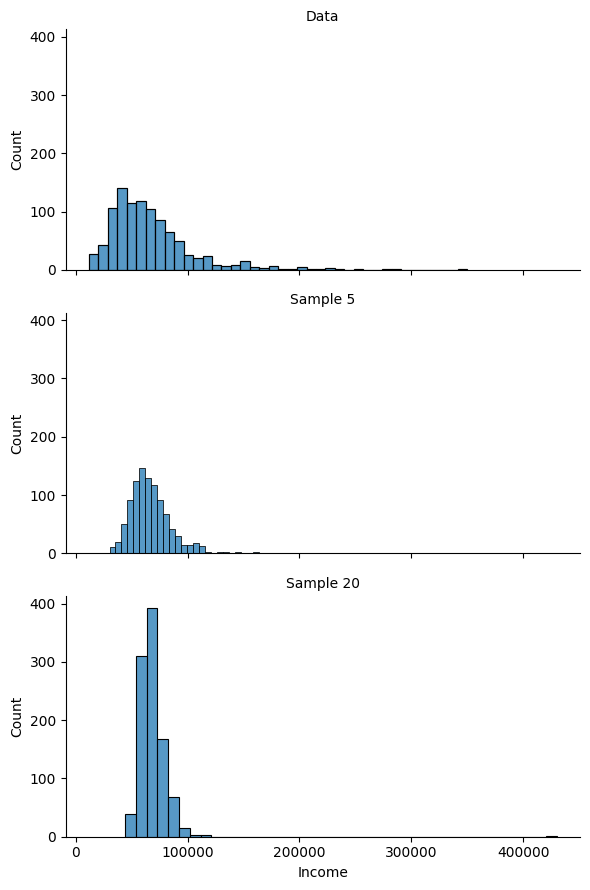

In [31]:
sns.FacetGrid(sample, col='type', col_wrap=1, aspect=2).map(sns.histplot, 'income', bins=40).set_titles('{col_name}').set_axis_labels('Income', 'Count')
plt.show()

### Central Limit Theorem

- The Central Limit Theorem states that the sampling distribution of the sample mean is approximately normally distributed, regardless of the shape of the population distribution. - Provided that the sample size is sufficiently large.

### Standard Error

- The standard error is the standard deviation of the sampling distribution of a statistic. It is a measure of the variability of the sample statistic.

$$SE = \frac{s}{\sqrt{n}}$$

Where:

- $s$ = Standard deviation of the population
- $n$ = sample size


## `The Bootstrap`

- The bootstrap is a resampling technique used to estimate statistics on a population by sampling with replacement.

Algorithm:

1. Draw a sample of size n with replacement from the original sample.
2. Calculate the statistic of interest.
3. Repeat steps 1 and 2 a large number of times.
4. Calculate the standard deviation of the bootstrapped statistics.
5. Produce a histogram or boxplot of the bootstrapped statistics.
6. Calculate the confidence interval.

In [34]:
from sklearn.utils import resample

results = []

for _ in range(1000):
    sample = resample(df_loan["annual_inc"])
    results.append(sample.median())

results = pd.Series(results)

print("Bootstrao Statistics:")
print(f"Original: {df_loan['annual_inc'].median()}")
print(f"bias: {results.mean() - df_loan['annual_inc'].median()}")
print(f"std. error: {results.std()}")

Bootstrao Statistics:
Original: 60000.0
bias: -275.1924999999974
std. error: 403.8757424122656


## `Confidence Intervals`

- A confidence interval is a range of values that is likely to contain the true value of an unknown population parameter.

Algorithm:

1. Draw random samples of size n with replacement from the original data.
2. Calculate the statistic of interest.
3. Repeat steps 1 and 2 a large number of times.
4. For an x% confidence interval, trim [(100-x)/2]% from resampled results from any side of the distribution.
5. The trimmed values are the lower and upper bounds of the confidence interval.


## `Normal Distribution`

- A normal distribution is a continuous probability distribution that is symmetric about the mean.

### Properties of Normal Distribution

- In normal distribution, 68% of the data falls within 1 standard deviation of the mean, 95% falls within 2 standard deviations, and 99.7% falls within 3 standard deviations.


### Standard Normal Distribution

- A standard normal distribution is a normal distribution with a mean of 0 and a standard deviation of 1.

### Z-Score

- The Z-score is the number of standard deviations a data point is from the mean.

$Z = \frac{x - \mu}{\sigma}$

Where:

- $x$ = data point
- $\mu$ = mean
- $\sigma$ = standard deviation



### Standard Normal and QQ Plots

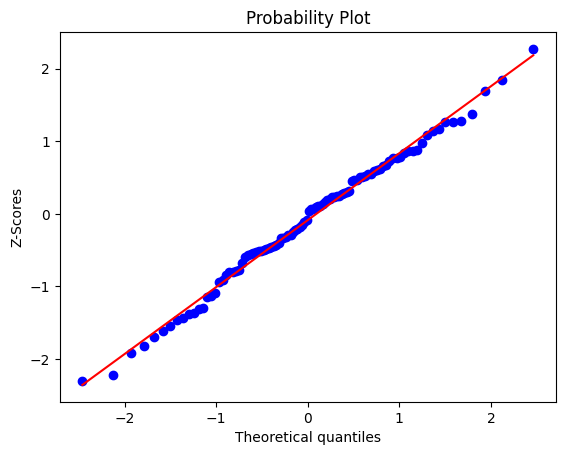

In [37]:
from scipy.stats import norm, probplot

fig, ax = plt.subplots()

norm_sample = norm.rvs(size=100)
probplot(norm_sample, plot=ax) 
plt.ylabel("Z-Scores")
plt.show()

### Long-Tailed Distributions

- A long-tailed distribution is a distribution with a tail that extends further than a normal distribution.

### Skewness

- Skewness is a measure of the asymmetry of a distribution.

In [38]:
sp500_px = pd.read_csv("data/sp500_data.csv.gz", index_col=0)
nflx = sp500_px["NFLX"]

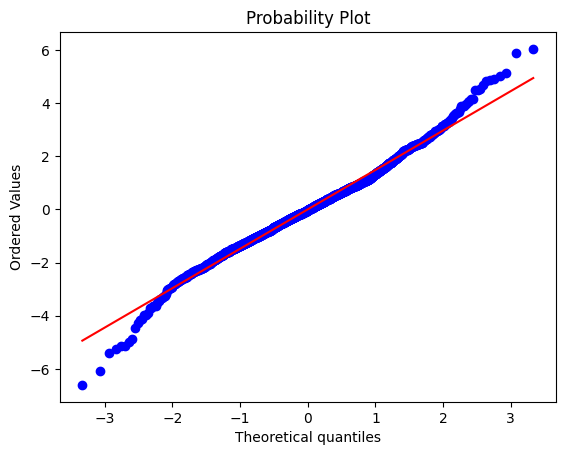

In [39]:
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots()
probplot(nflx, plot=ax)
plt.show()

- The points are far below for the left-skewed distribution and far above for the right-skewed distribution.

#### Long-Tailed Distributions with KDE Plots

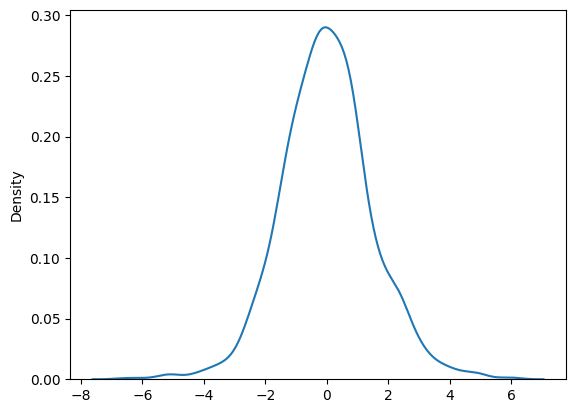

In [41]:
sns.kdeplot(data=nflx)
plt.show()

## `Student's t-Distribution`

- The t-distribution is a continuous probability distribution that is symmetric and bell-shaped, like the normal distribution, but has heavier tails.

#### Degrees of Freedom

- A parameter that allows the t-distribution to adjust to different sample sizes.

$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$

Where:

- $\bar{x}$ = sample mean
- $\mu$ = population mean
- $s$ = sample standard deviation
- $n$ = sample size


- A 90% confidence interval around sample mean is given by:

$\bar{x} \pm t_{n-1} \times (0.05) \times \frac{s}{\sqrt{n}}$

Where:

- $t_{n-1}(0.05)$ is the value of t-statistic with degrees of freedom n-1, which chops off 5% from each tail of the distribution.

## `Binoial Distribution`

- The binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of Bernoulli trials.

Formula:

$P(X = k) = \binom{n}{k} \times p^k \times (1-p)^{n-k}$

Where:

- $n$ = number of trials
- $k$ = number of successes
- $p$ = probability of success


In [7]:
from scipy import stats

stats.binom.pmf(1, n=200, p=0.02), stats.binom.cdf(0, n=200, p=0.02)

(0.07178753716621049, 0.017587946605721567)

## `Chi-Square Distribution`

- The statistic that measures the extent to which observed counts deviate from expected counts.

Formula:

$\chi^2 = \sum \frac{(O - E)^2}{E}$

Where:

- $O$ = observed frequency
- $E$ = expected frequency



## `F-Distribution`

- The F-distribution is a continuous probability distribution that is used in the analysis of variance (ANOVA).
- Its is the ratio of the variablity between groups means to the variability within group means.

Formula:

$F = \frac{SSE_{between}}{SSE_{within}}$

Where:

- $SSE_{between}$ = Sum of squares of the differences between group means and overall mean.
- $SSE_{within}$ = Sum of squares of the differences between individual observations and their group mean.


## `Poisson and Related Distributions`

### Poisson Distribution

- The Poisson distribution is a discrete probability distribution that describes the number of events in a fixed interval of time or space.

Formula:

$P(X = k) = \frac{e^{-\lambda} \times \lambda^k}{k!}$

Where:

- $k$ = number of events
- $\lambda$ = average rate of events


In [10]:
stats.poisson.rvs(2, size=100)

array([6, 3, 2, 2, 3, 0, 2, 1, 4, 1, 3, 1, 0, 1, 2, 3, 1, 2, 2, 1, 4, 0,
       1, 1, 1, 2, 2, 2, 0, 4, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 1, 1, 3, 1,
       1, 2, 0, 2, 1, 3, 3, 1, 1, 5, 2, 1, 1, 4, 2, 1, 2, 0, 4, 4, 3, 2,
       3, 2, 1, 2, 1, 2, 0, 1, 0, 1, 4, 3, 2, 2, 0, 2, 0, 3, 0, 1, 1, 1,
       2, 2, 6, 4, 3, 1, 3, 3, 3, 1, 0, 0])

### Exponential Distribution

- The exponential distribution is a continuous probability distribution that describes the time between events in a Poisson process.

Formula:

$P(X = x) = \lambda \times e^{-\lambda x}$

Where:

- $x$ = time between events
- $\lambda$ = average rate of events



In [11]:
stats.expon.rvs(scale=1/2, size=100)

array([0.37925813, 0.72314053, 0.76597617, 1.20279656, 0.33205738,
       1.19353936, 0.97561181, 0.29756682, 0.22327315, 0.24990069,
       0.19968025, 0.32725022, 0.02926009, 0.08310847, 0.16781418,
       0.27944471, 0.28901256, 0.18201733, 0.04513125, 1.37943879,
       0.67092794, 0.26836829, 2.10045254, 0.10961605, 0.58560722,
       0.02753224, 0.09322598, 0.13212395, 0.18797538, 0.12360647,
       0.36359732, 0.55029655, 0.22149491, 0.04733365, 0.06217855,
       0.61984215, 0.08566009, 0.05183339, 0.03854244, 0.26901987,
       0.14752108, 0.08760391, 0.9782585 , 1.05551929, 0.50389719,
       0.08704713, 0.02833777, 0.55763417, 0.07578084, 0.32347715,
       0.19696648, 1.35054494, 0.22140305, 1.17359075, 0.50838454,
       0.1533625 , 0.20173992, 0.54676261, 0.5888478 , 0.02584672,
       0.00744257, 0.39842171, 0.04390362, 0.29669985, 0.2480477 ,
       0.63700568, 0.7664952 , 0.09877835, 0.04285784, 0.32867346,
       0.17112232, 1.04488082, 0.14007418, 1.85916154, 0.22374

### Estimating the Failure Rate

- The failure rate is the number of failures that occur in a given time period.

### Weibull Distribution

- The Weibull distribution is a continuous probability distribution that is used to model the life of products.


In [12]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 2736.874062  ,  1961.11226312,  6110.5927517 ,  1606.97590914,
        2100.6306701 , 13970.01073472,  6315.75171748,  1051.73116558,
        3262.5088588 ,   686.18575601,  2449.39406312,  4828.27929878,
         892.30733816,  8083.84287594,  5708.07548507,  2608.86560542,
        3844.73202614,  3871.03163031,  5940.50254441,  6322.31746852,
        1667.76871948,  3011.62315674,  2088.55326696,  5134.37809927,
        1772.58064993,  5501.5256637 ,  1150.97521631,  2915.80576198,
        7825.0962581 ,  4390.42207876,  1836.74360382,  7622.05581762,
         650.19191941,   311.99693697,  4658.6276131 ,  2391.25830532,
        4706.11412741,  2213.18910024,  1257.60138598,  2720.18708784,
        1930.07859299,  2319.73640622,  7243.70404421,   278.10874919,
        3262.99084271,  8003.83657259,  5064.13355178,  3298.28454718,
        2804.02980794,  4797.22204554,  5257.01111064,  1514.5680073 ,
        7904.5750905 ,   894.76052475, 11286.29949247,  1620.34943827,
      